<a href="https://colab.research.google.com/github/Rubiel1/Convolutional-Neural-Networks-Applied-to-Modification-of-Images/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to VGG19

In this notebook you will see the code required to classify images using VGG19.


 ## Required libraries.

In [ ]:
%matplotlib inline
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy
import json
import warnings
warnings.filterwarnings("ignore")

I have seen instances in which training an algorithm last 50 min in cpu, and the same process last only 1 min using CUDA.

We now download the required files.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.__version__)
#we download the list of classes of vgg19
!wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
#We download the list of test images
!wget https://raw.githubusercontent.com/Rubiel1/rubiel1.github.io/master/img/cap224.png
!wget https://raw.githubusercontent.com/Rubiel1/rubiel1.github.io/master/img/mus224.png


1.12.0+cu113
--2022-08-07 23:20:01--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.37.158
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.37.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/octet-stream]
Saving to: ‘imagenet_class_index.json’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0.02s   

2022-08-07 23:20:01 (1.83 MB/s) - ‘imagenet_class_index.json’ saved [35363/35363]

--2022-08-07 23:20:01--  https://raw.githubusercontent.com/Rubiel1/rubiel1.github.io/master/img/cap224.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89977 (88K) [image/png]
Saving to: ‘cap224.png

The images need preprocessing: resizing and adding the batch dimension since the NN works with objects in 4 dimensions.

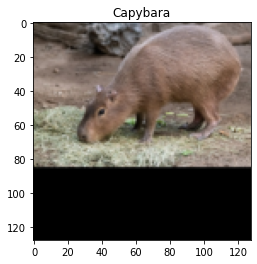

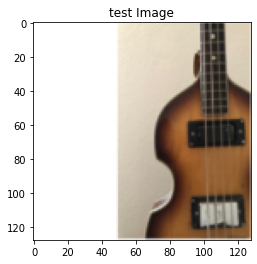

In [ ]:
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)
test_img = image_loader("cap224.png")
test2_img = image_loader("mus224.png")
unloader = transforms.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated

plt.figure()
imshow(test_img, title='Capybara')


plt.figure()
imshow(test2_img, title='test Image')


We now evaluate the model on the image of the capybara


 Here is the list of top 3 class predictions:
3- hare
2- Arctic_fox
1- wallaby


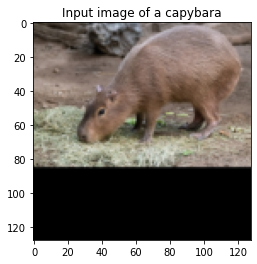

 Note that 'capybara' was not part of the labels used to train the neural network vgg19.
 Here is the list of classes used in VGG19 that start with 'ca' 
cairn
cabbage_butterfly
capuchin
cab
caldron
candle
cannon
canoe
can_opener
cardigan
car_mirror
carousel
carpenter's_kit
carton
car_wheel
cash_machine
cassette
cassette_player
castle
catamaran
cauliflower
cardoon
carbonara


In [ ]:

cnn = models.vgg19(pretrained=True).eval()
input_img = test_img.clone()
out = cnn(input_img)



class_idx = json.load(open("imagenet_class_index.json"))
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

print(f"\n Here is the list of top 3 class predictions:")

for i, idx in enumerate(out[0].sort()[1][-3:]):
    print(f"{3-i}- {idx2label[idx]}")
plt.figure()
imshow(input_img, title='Input image of a capybara')

print(f" Note that 'capybara' was not part of the labels used to train the neural network vgg19.\n Here is the list of classes used in VGG19 that start with 'ca' ")
ca_list = [prob for prob in idx2label if prob.startswith('ca')]
for item in ca_list:
    print(item)


Now we evaluate on the image of the music instrument:

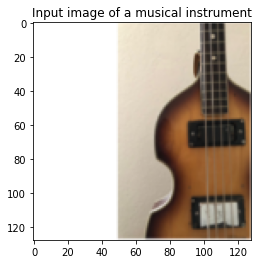

10-syringe
9-cello
8-panpipe
7-slide_rule
6-wall_clock
5-pick
4-rule
3-banjo
2-acoustic_guitar
1-electric_guitar


In [ ]:
input2_img = test2_img.clone()
plt.figure()
imshow(input2_img, title='Input image of a musical instrument')
out2 = cnn(input2_img)

print("predicted classes")

for i, idx in enumerate(out2[0].sort()[1][-10:]):
    print(f"{10-i}-{idx2label[idx]}")



To test with your own images (one image at a time), go to the right side of the colab screen, and click on Files (the icon is a folder). Upload your images to that section. Then below search for the '###' symbols and remove them, there you can put the path to your image.

--2022-08-08 00:49:52--  https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.229.72
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.229.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [application/octet-stream]
Saving to: ‘imagenet_class_index.json’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0.09s   

2022-08-08 00:49:52 (403 KB/s) - ‘imagenet_class_index.json’ saved [35363/35363]

--2022-08-08 00:49:52--  https://raw.githubusercontent.com/Rubiel1/rubiel1.github.io/master/img/cap224.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89977 (88K) [image/png]
Saving to: ‘cap224.png’

cap224.png 

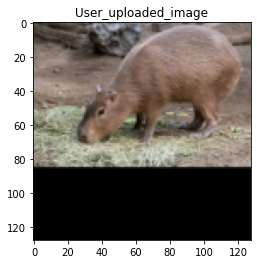

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

predicted classes
10-grey_fox
9-wood_rabbit
8-kit_fox
7-hog
6-wild_boar
5-wombat
4-mongoose
3-hare
2-Arctic_fox
1-wallaby


In [ ]:
%matplotlib inline
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy
import json
import warnings
import os

warnings.filterwarnings("ignore")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

unloader = transforms.ToPILImage()  # reconvert into PIL image
plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated

if not os.path.isfile("imagenet_class_index.json"):
    #we download the list of classes of vgg19
    !wget https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json

class_idx = json.load(open("imagenet_class_index.json"))
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]


#-----------------------------------edit the code below to test your own images----------------------

!wget https://raw.githubusercontent.com/Rubiel1/rubiel1.github.io/master/img/cap224.png #comment this line
test_img = image_loader("cap224.png")### replace this by the name of your file, replace the file extension if needed
plt.figure()
imshow(test_img, title='User_uploaded_image')
cnn = models.vgg19(pretrained=True).eval()
input_img = test_img.clone()
out = cnn(input_img)
print("predicted classes")

for i, idx in enumerate(out[0].sort()[1][-10:]):
   print(f"{10-i}-{idx2label[idx]}")




This notebook was written by Eric Dolores <http://rubiel1.github.io/>.

This notebook is based on a notebook created by Alexis Jacq <https://alexis-jacq.github.io> and Winston Herring <https://github.com/winston6>.
The image of capybara was donated to wikipedia by Eric Kilby - https://www.flickr.com/photos/ekilby/45778977114/, CC BY-SA 2.0, https://commons.wikimedia.org/w/index.php?curid=112395009
